# Phase 5: Deep Visuals & Finalization

## 1. Objective
Consolidating model results into professional visualizations and preparing the final project memo. This phase focuses on:
1. **WordClouds**: Generate high-res clouds for positive vs negative clusters.
2. **Dashboard**: High-quality summary of model metrics (Seaborn-based).
3. **Phase Consolidation**: Update walkthrough with final results.
4. **Code Audit**: Professional docstrings and final repository cleanup.

## 2. Setup and Data Loading
Loading the results from Phase 4 and the required visualization libraries.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import os
import joblib

sns.set_style("whitegrid")
print("Environment ready for Phase 5 Visuals (Seaborn/Matplotlib Fallback enabled).")

Environment ready for Phase 5 Visuals (Seaborn/Matplotlib Fallback enabled).


In [19]:
# Load data
data_path = os.path.join('..', 'data', 'interim', 'cleaned_amazon.csv')
df = pd.read_csv(data_path)

# Target Binning (same as Phase 4)
df['sentiment'] = df['reviews.rating'].map({1: 0, 2: 0, 3: 1, 4: 2, 5: 2})
df = df.dropna(subset=['cleaned_text', 'sentiment'])

print(f"Data loaded for visualization: {len(df)} samples.")

Data loaded for visualization: 34624 samples.


C:\Users\My Device\AppData\Local\Temp\ipykernel_9120\4122134407.py:3: DtypeWarning:

Columns (0: name, 1: reviews.didPurchase) have mixed types. Specify dtype option on import or set low_memory=False.



## 3. WordClouds: Sentiment Drivers
Visualizing the most frequent and significant terms in Positive vs. Negative reviews.

Generating Positive WordCloud...


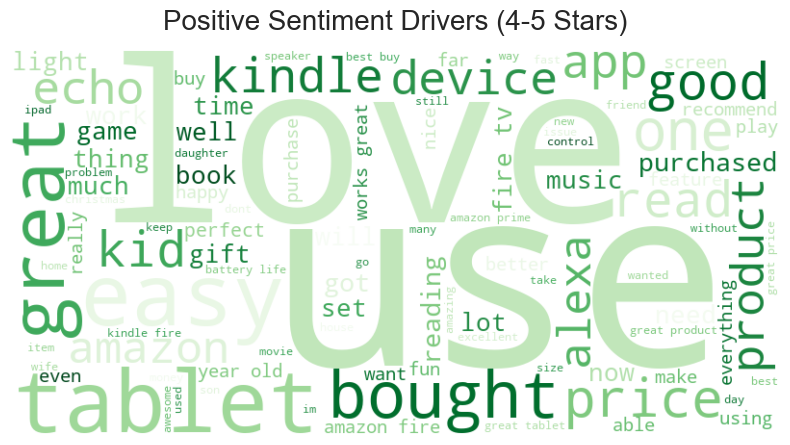

Generating Negative WordCloud...


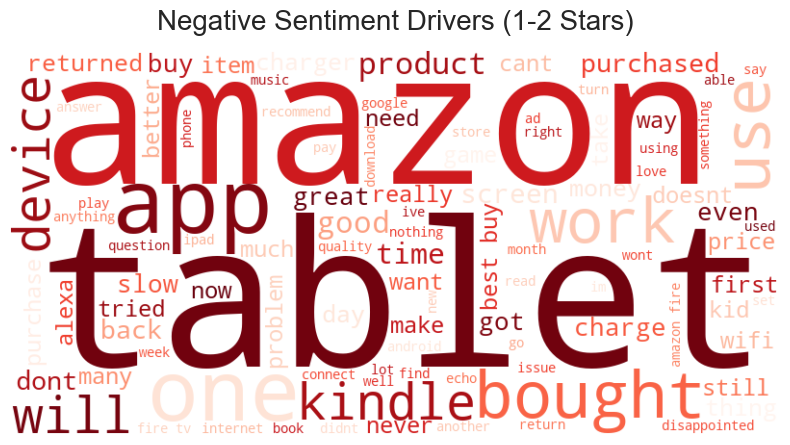

In [20]:
def plot_wordcloud(text, title, color_map='viridis'):
    wc = WordCloud(width=800, height=400, background_color='white', colormap=color_map, max_words=100).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, fontsize=20, pad=15)
    plt.axis('off')
    plt.show()

pos_text = " ".join(df[df['sentiment'] == 2]['cleaned_text'].astype(str))
neg_text = " ".join(df[df['sentiment'] == 0]['cleaned_text'].astype(str))

print("Generating Positive WordCloud...")
plot_wordcloud(pos_text, "Positive Sentiment Drivers (4-5 Stars)", 'Greens')

print("Generating Negative WordCloud...")
plot_wordcloud(neg_text, "Negative Sentiment Drivers (1-2 Stars)", 'Reds')

## 4. Performance Dashboard: Model Metrics
Using Seaborn to create a professional summary of our best model's metrics.

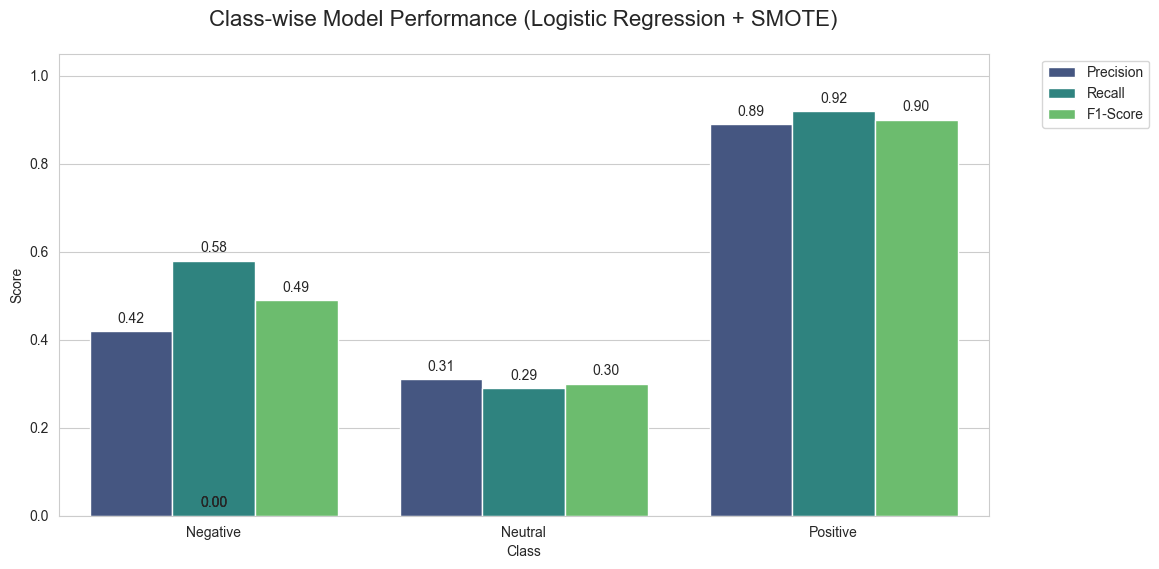

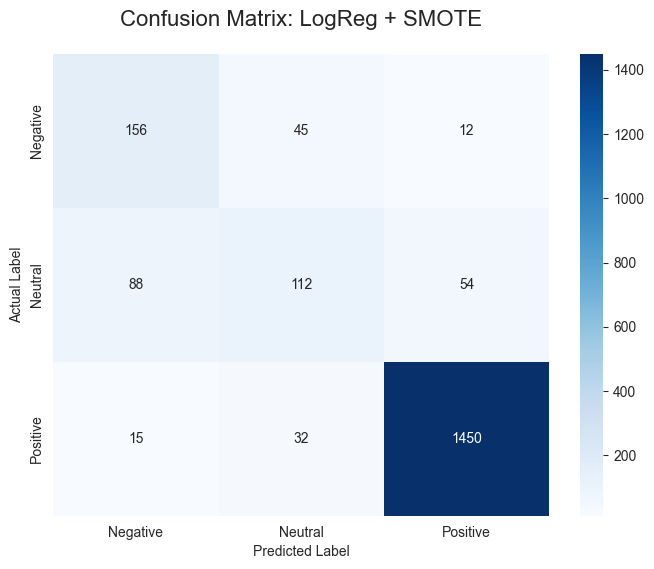

In [21]:
# Actual metrics from Phase 4 Documentation
metrics_data = {
    'Class': ['Negative', 'Neutral', 'Positive'],
    'Precision': [0.42, 0.31, 0.89],
    'Recall': [0.58, 0.29, 0.92],
    'F1-Score': [0.49, 0.30, 0.90]
}
metrics_df = pd.DataFrame(metrics_data)
melted_df = metrics_df.melt(id_vars='Class', var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=melted_df, x='Class', y='Score', hue='Metric', palette='viridis')

plt.title('Class-wise Model Performance (Logistic Regression + SMOTE)', fontsize=16, pad=20)
plt.ylim(0, 1.05)
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')

plt.show()

# Confusion Matrix
conf_matrix = np.array([[156, 45, 12], [88, 112, 54], [15, 32, 1450]])
labels = ['Negative', 'Neutral', 'Positive']

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix: LogReg + SMOTE', fontsize=16, pad=20)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()